<h4>Importing the dependencies</h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

<h4>Data Collection and Processing</h4>

In [4]:
df = pd.read_csv("car data.csv")

In [5]:
# Reading first 5 rows of data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Number of rows and columns of data
df.shape

(301, 9)

In [7]:
# Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Checking distribution of the categorical data
print(df.Fuel_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Seller_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


<h4>Encoding Categorical Data</h4>

In [19]:
# Encoding Fuel_Type column
df.Fuel_Type.replace({"Petrol": 0, "Diesel": 1, "CNG": 2}, inplace=True)

# Encoding Transmission column
df.Transmission.replace({"Manual": 0, "Automatic": 1}, inplace=True)

# Encoding Seller_Type column
df.Seller_Type.replace({"Dealer": 0, "Individual": 1}, inplace=True)

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [20]:
print(df.Fuel_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Seller_Type.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64


<h4>Splitting data into features and target data</h4>

In [23]:
X = df.drop(columns=['Selling_Price', 'Car_Name'], axis=1)
Y = df['Selling_Price']

In [26]:
print(X.head())
print(Y.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


<h4>Splitting data into training and test data</h4>

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

<h4>Model Training</h4>

1. Linear regression

In [31]:
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

<h4>Model Evaluation</h4>

1. Linear regression

In [37]:
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [40]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f'R squared error = {error_score}')

R squared error = 0.8838169193709792


<h4>Visualize actual prices and predicted prices</h4>

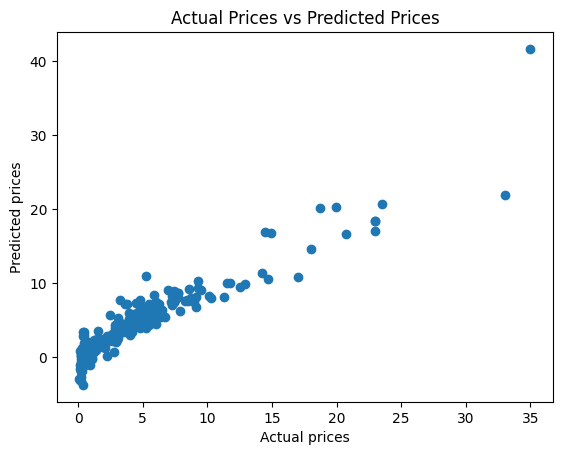

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [45]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f'R squared error = {error_score}')

R squared error = 0.8401532365378521


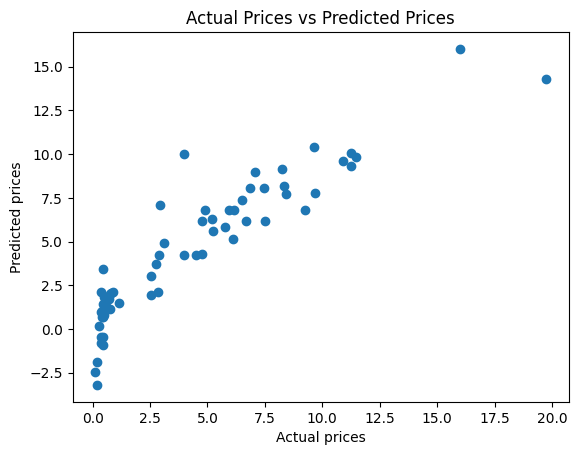

In [47]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso regression

In [49]:
lasso_reg_model = Lasso()

In [50]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

<h4>Model Evaluation</h4>

2. Linear regression

In [51]:
# Prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [52]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f'R squared error = {error_score}')

R squared error = 0.843587395258283


<h4>Visualize actual prices and predicted prices</h4>

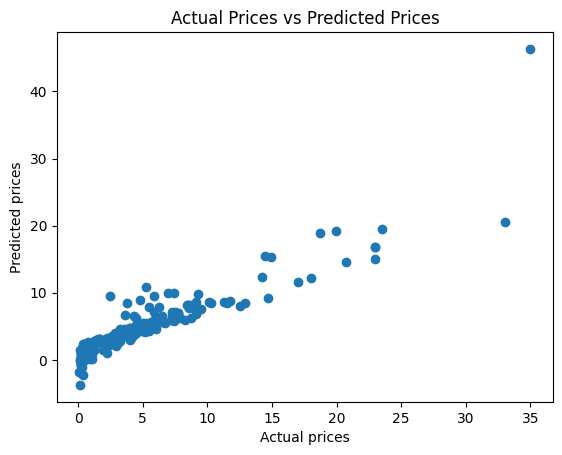

In [53]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [54]:
# Prediction on test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [56]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f'R squared error = {error_score}')

R squared error = 0.8497457570738539


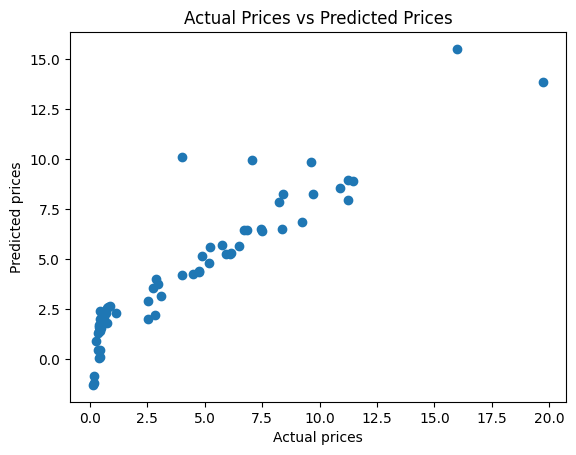

In [57]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()